In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('Mall_Customers_cluster.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = data.iloc[:, 3:5].values

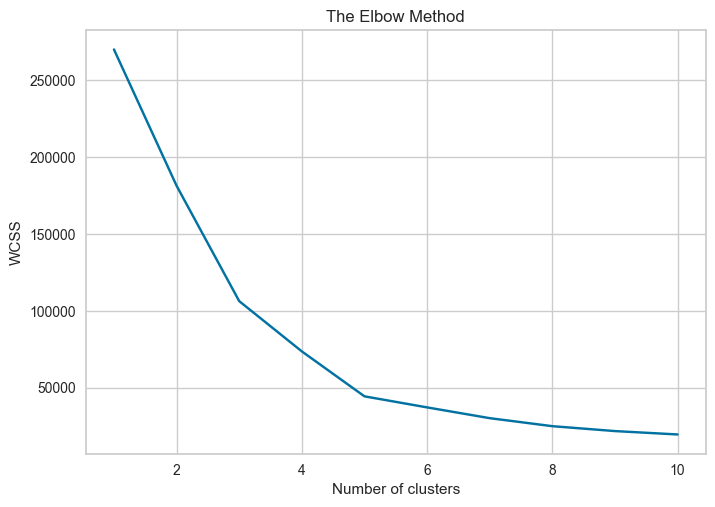

In [5]:
# Elbolw Method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualizing the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


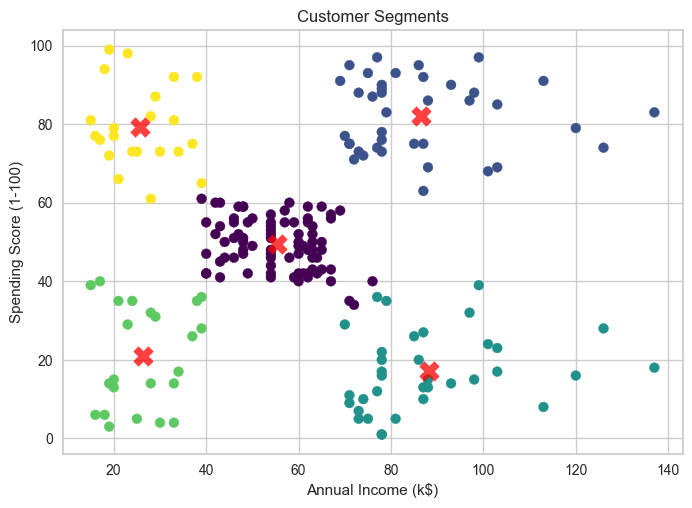

In [6]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()

In [7]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.553931997444648


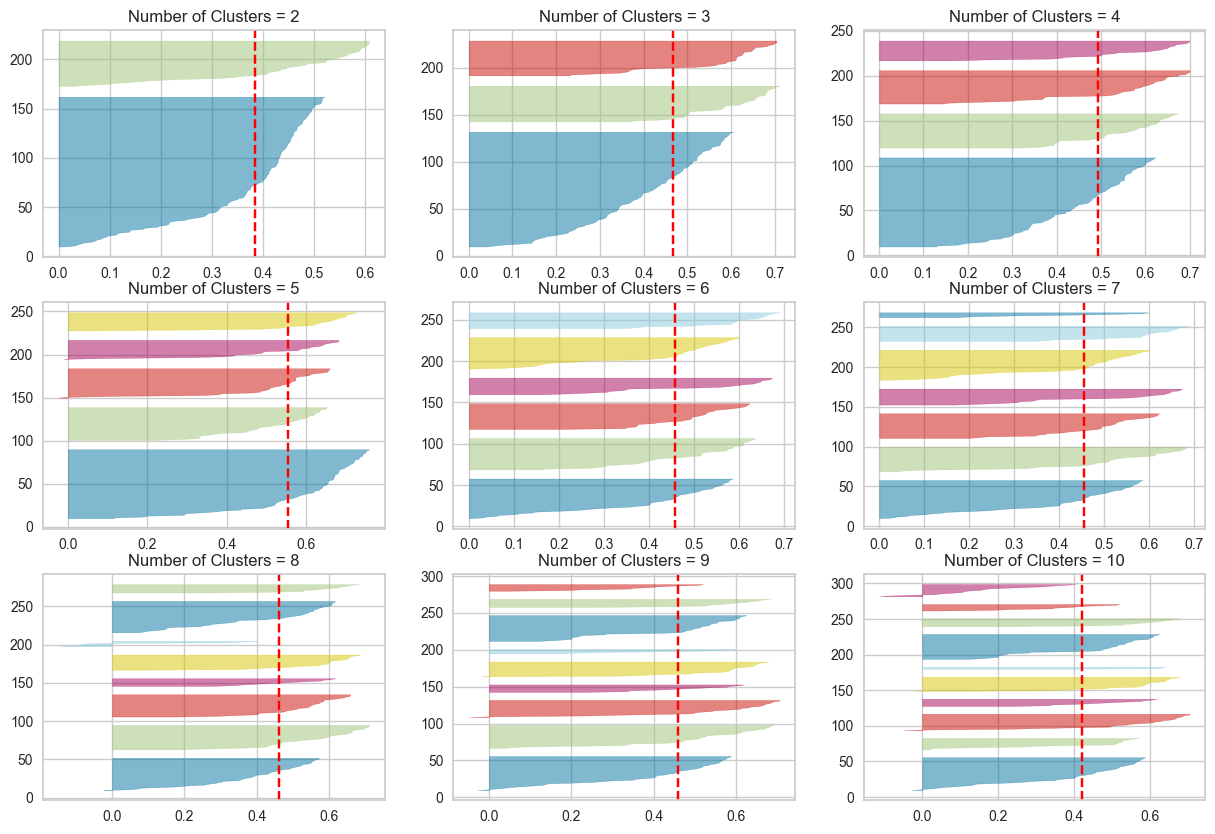

In [9]:
# Silhouette Analysis for different number of clusters
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
ax = ax.ravel()
m = 0
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[m])
    ax[m].set_title(f'Number of Clusters = {i}')
    visualizer.fit(X)
    m += 1

## Implementing Clustering on entire dataset

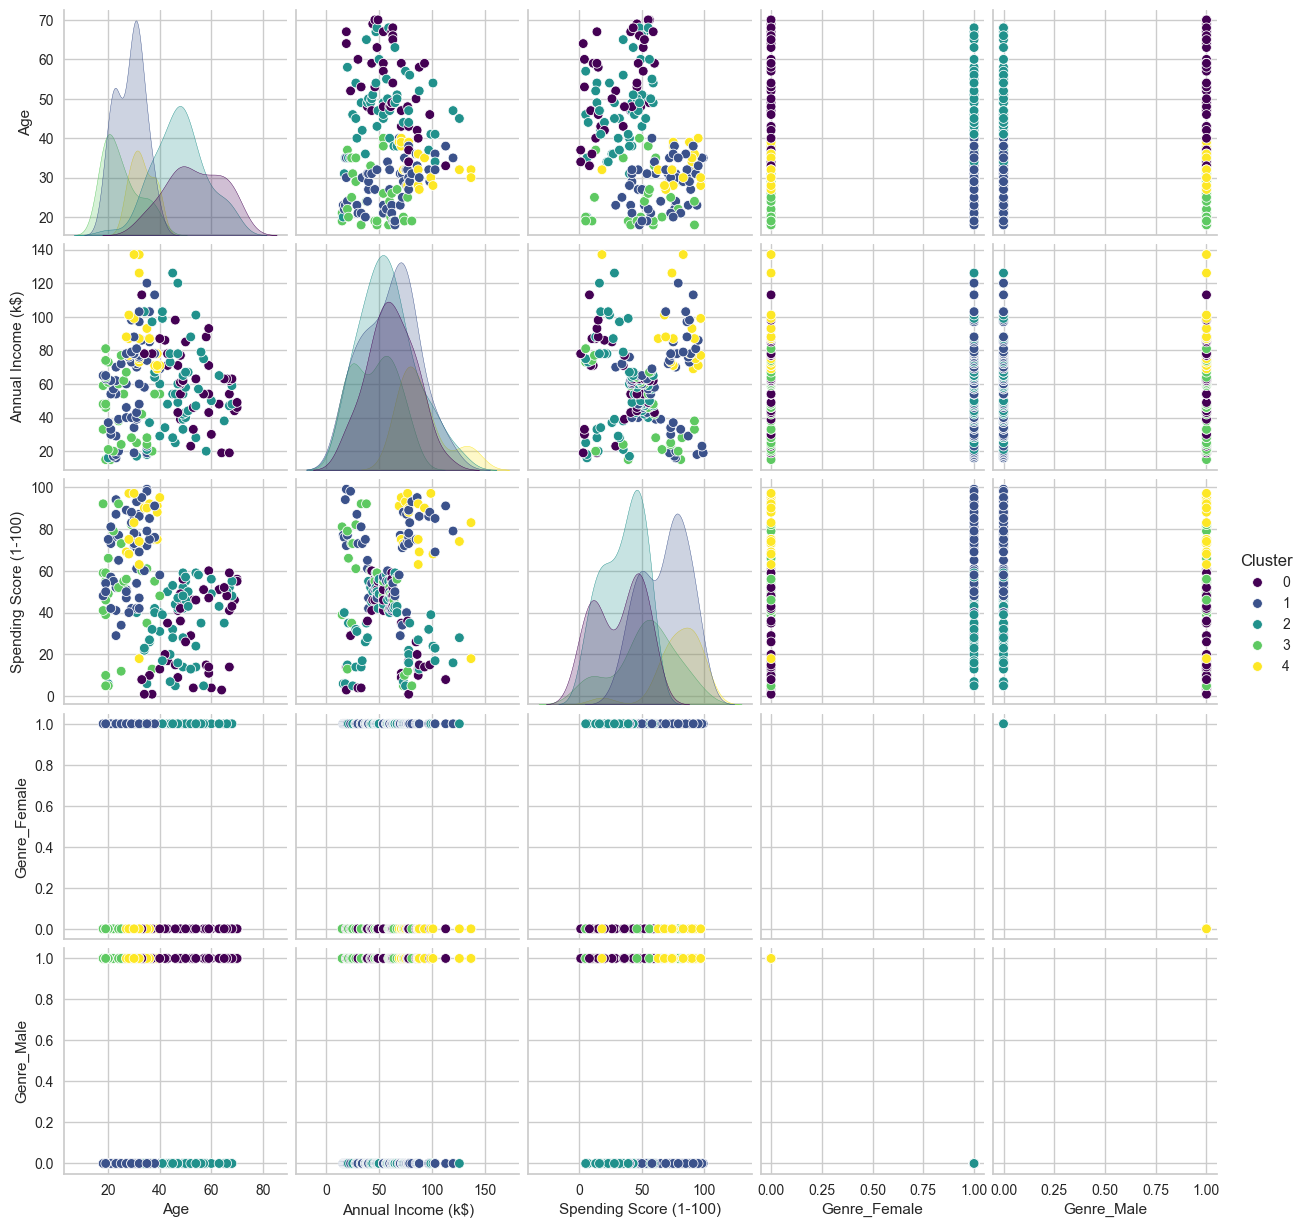

Cluster Centers (scaled):
[[ 1.06214701  0.03206232 -0.72984534 -1.12815215  1.12815215]
 [-0.75047453 -0.00501655  0.6979562   0.88640526 -0.88640526]
 [ 0.64256818 -0.09498735 -0.59494042  0.88640526 -0.88640526]
 [-0.99149394 -0.58075445  0.06854013 -1.12815215  1.12815215]
 [-0.40472636  1.11366341  1.12827715 -1.12815215  1.12815215]]
Cluster Centers (original scale):
[[ 5.36500000e+01  6.14000000e+01  3.14000000e+01  0.00000000e+00
   1.00000000e+00]
 [ 2.83928571e+01  6.04285714e+01  6.81785714e+01  1.00000000e+00
  -2.77555756e-16]
 [ 4.78035714e+01  5.80714286e+01  3.48750000e+01  1.00000000e+00
  -2.77555756e-16]
 [ 2.50344828e+01  4.53448276e+01  5.19655172e+01  0.00000000e+00
   1.00000000e+00]
 [ 3.32105263e+01  8.97368421e+01  7.92631579e+01  0.00000000e+00
   1.00000000e+00]]


In [12]:
# Clustering on entire dataset after dropping CustomerID and converting categorical columns to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Genre'])
data_full = data.drop(['CustomerID'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_full)
kmeans_full = KMeans(n_clusters=5, random_state=0)
y_kmeans_full = kmeans_full.fit_predict(data_scaled)
data_full['Cluster'] = y_kmeans_full
sns.pairplot(data_full, hue='Cluster', palette='viridis')
plt.show()
centers_full = kmeans_full.cluster_centers_
print("Cluster Centers (scaled):")
print(centers_full)
# Inverse transform to get original scale
centers_original = scaler.inverse_transform(centers_full)
print("Cluster Centers (original scale):")
print(centers_original)